<a href="https://colab.research.google.com/github/RojaCM/PROJECTS/blob/main/Final%20Mobile%20Price%20Range%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contents :1. Data Exploration2. Data Pre-processing3.Data Cleaning4.Univariate Analysis5.Multivariate Analysis6.Outlier Treatment7.Feature Engineering8.Standardization9.K nearest neighbours model10.Logistic regression model11.XGBoost Classifier12. Hyper parameter tuning 13.Model Explainability14.Conclusion


#Mobile Price Range Prediction

 In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:-RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.


Attribute Information 

Battery_power-TotalenergyabatterycanstoreinonetimemeasuredinmAhBlue-HasbluetoothornotClock_speed-speedatwhichmicroprocessorexecutesinstructions

Dual_sim-Hasdualsimsupportornot

Fc-FrontCameramegapixels

Four_g-Has4Gornot

Int_memory-InternalMemoryinGigabytes

M_dep-MobileDepthincm

Mobile_wt-Weightofmobilephone

N_cores-Numberofcoresofprocessor

Pc-PrimaryCameramegapixels

Px_height-PixelResolutionHeight

Px_width-PixelResolutionWidth

Ram-RandomAccessMemoryinMegaBytes

Sc_h-ScreenHeightofmobileincm

Sc_w-ScreenWidthofmobileincm

Talk_time-longesttimethatasinglebatterychargewilllastwhenyouareThree_g-Has3Gornot

Touch_screen-Hastouchscreenornot

Wifi-HaswifiornotPrice_range-Thisisthetargetvariablewithvalueof0(lowcost),1(mediumcost),2(highcost)and3(veryhighcost).


EXPLORING THE DATASET

In [1]:
#reading the file
from google.colab import files
uploaded=files.upload()

Saving data_mobile_price_range.csv to data_mobile_price_range.csv


In [15]:
 #importing libraries
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 %matplotlib inline
 import warnings
 warnings.filterwarnings('ignore')
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LinearRegression
 from sklearn.linear_model import LogisticRegression
 from sklearn.preprocessing import StandardScaler,MinMaxScaler
 from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
df=pd.read_csv('data_mobile_price_range.csv')

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.shape

(2000, 21)

In [9]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [16]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

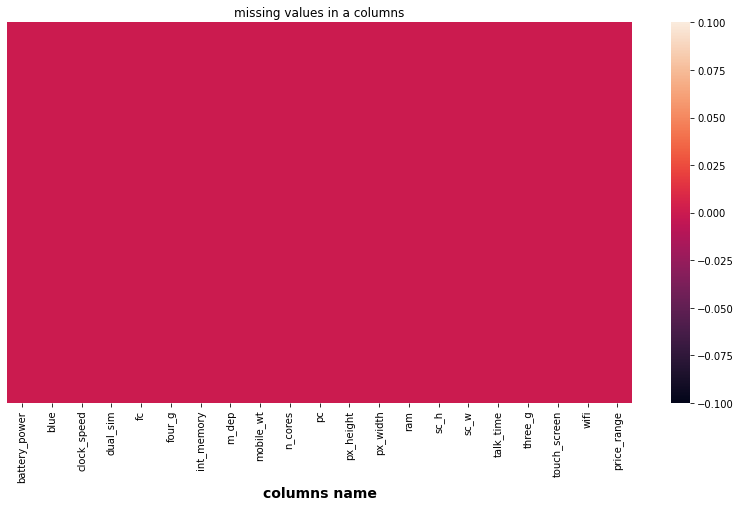

In [18]:
#checking missing values
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull(),cbar=True,yticklabels=False)
plt.xlabel('columns name',size=14,weight='bold')
plt.title('missing values in a columns')
plt.show()

Exploratory Data Analysis
Checking the categories of price range

In [19]:
df1=df.copy()

In [20]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [21]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

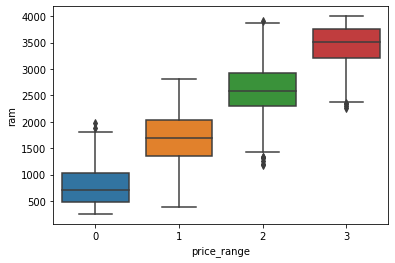

In [24]:
#Boxplot between ram and price_range
sns.boxplot(y='ram',x='price_range',data=df)
plt.show()

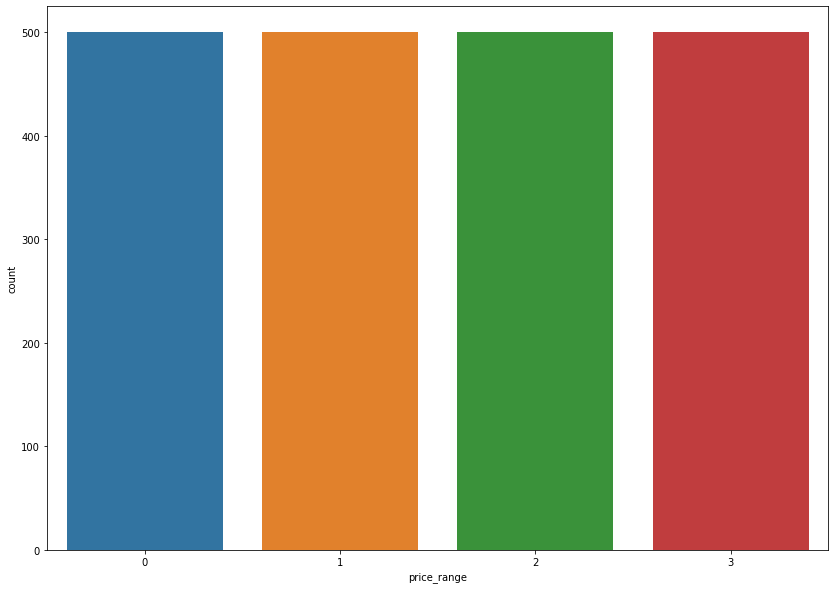

In [25]:
plt.figure(figsize=(14,10))
sns.countplot(df.price_range)
plt.show()

In [28]:
cols=df.columns

In [29]:
cols

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

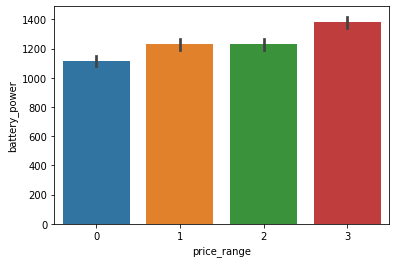

In [30]:
sns.barplot(x='price_range',y='battery_power',data=df)

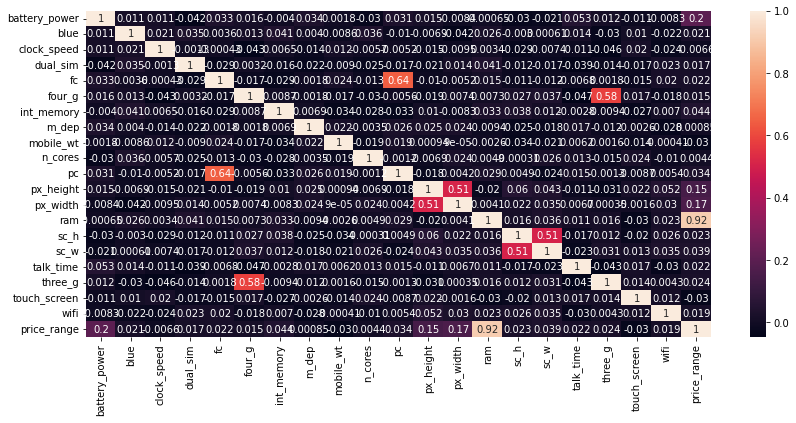

In [32]:
plt.figure(figsize=(14,6))
psns.heatmap(df.corr(),annot=True)

price range and ram are highly correlated]

In [34]:
df['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

([<matplotlib.patches.Wedge at 0x7fc73e871950>,
 [Text(-0.8054050133969238, 0.7492147652009409, '3g supported'),
  Text(0.8054050133969238, -0.749214765200941, '3g not supported')],
 [Text(-0.43931182548923114, 0.4086625992005132, '76.2%'),
  Text(0.43931182548923114, -0.40866259920051323, '23.8%')])

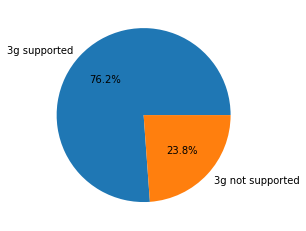

In [47]:
labels=['3g supported','3g not supported']
plt.pie(df['three_g'].value_counts().values,labels=labels,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fc73e9db310>,
 [Text(-0.0742421550154638, 1.097491732278043, '4G supported'),
  Text(0.07424215501546366, -1.0974917322780433, '4G not supported')],
 [Text(-0.0404957209175257, 0.5986318539698416, '52.1%'),
  Text(0.04049572091752563, -0.5986318539698418, '47.9%')])

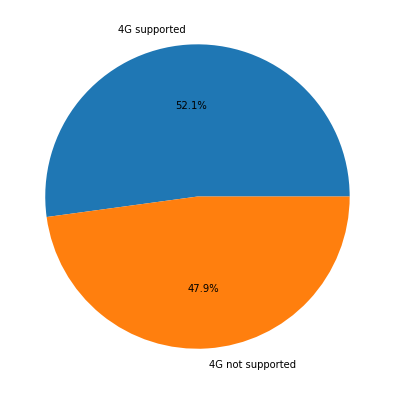

In [44]:
#4G supported or not
plt.figure(figsize=(15,7))
labels1=['4G supported','4G not supported']
plt.pie(df['four_g'].value_counts().values,labels=labels1,autopct='%1.1f%%')


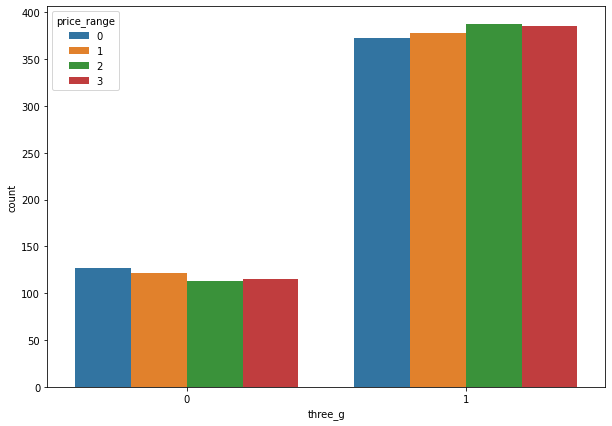

In [46]:
#price range between 3G
plt.figure(figsize=(10,7))
sns.countplot(df['three_g'],hue=df['price_range'])


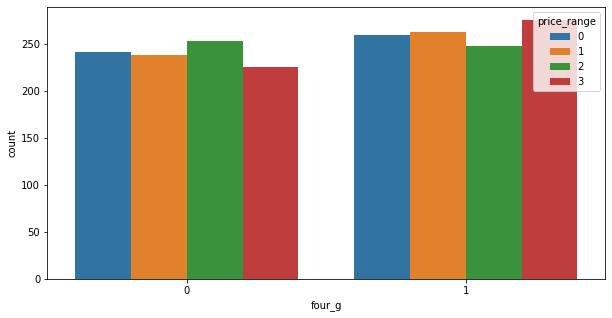

In [49]:

#price range between 4G
plt.figure(figsize=(10,5))
sns.countplot(df['four_g'],hue=df['price_range'])


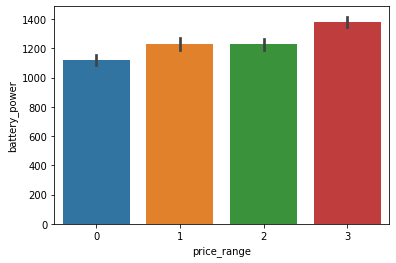

In [51]:
#relationship between price_range and battery_power

sns.barplot(x='price_range',y='battery_power',data=df)

CHECKING OUTLIERS

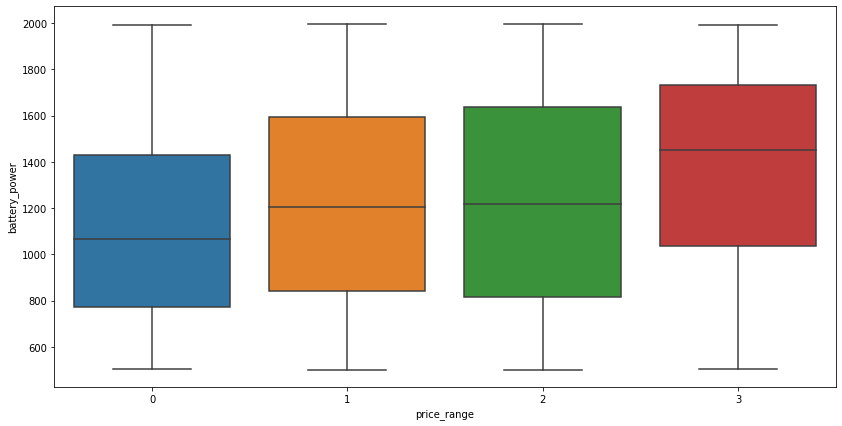

In [52]:
plt.figure(figsize=(14,7))
sns.boxplot(x='price_range',y='battery_power',data=df)

In [54]:
#splitting the dataset
x=df.drop('price_range',axis=1)

In [56]:
x.shape

(2000, 20)

In [57]:
y=df['price_range']

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [59]:
x_train.shape

(1400, 20)

In [60]:
x_test.shape

(600, 20)

Fitting Models
In this section we are going to implement various machine learning algorithms to make our predictions. Some of the algorithms we will be using are: KNN Classifier, Logistic Regression, Random Forest Classifier, XGBoost Classifier.

The detailed step we will be following are as follows:
Initial fitting of the model.

Evaluating the performance of the model using metrics.

Hyperparameter tuning to improve model performance and to reduce if overfitting occurs.

1. Logistic Regression
Target variables of the data set are discrete, hence, we are going to apply multiclass logistic regression model.

In [63]:
lr=LogisticRegression(multi_class='multinomial')

In [64]:
model1=lr.fit(x_train,y_train)

In [66]:
y_pred=model1.predict(x_test)

In [68]:
accuracy_score(y_test,y_pred)

0.635

In [69]:
confusion_matrix(y_test,y_pred)

array([[114,  36,   1,   0],
       [ 27,  74,  36,   9],
       [  1,  30,  79,  38],
       [  0,   3,  38, 114]])

3.Decision Tree
Decision tree is one of the most popular supervised learning algorithm that is mostly used in classification problems

In [71]:
dt=DecisionTreeClassifier()

In [72]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
y_pre=dt.predict(x_test)

In [80]:
accuracy_score(y_test,y_pre)

0.8133333333333334

In [81]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.75      0.78       151\n           1       0.52      0.51      0.51       146\n           2       0.51      0.53      0.52       148\n           3       0.71      0.74      0.72       155\n\n    accuracy                           0.64       600\n   macro avg       0.64      0.63      0.63       600\nweighted avg       0.64      0.64      0.64       600\n'